In [1]:
from smart_open import open
import json
import boto3
from urllib.parse import urlparse
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# Some utilities

In [2]:
def list_s3_files(bucket_name, prefix, extension):
    """
    List all files in an S3 bucket that match the given prefix and extension.
    
    Args:
        bucket_name (str): Name of the S3 bucket
        prefix (str): Prefix to filter files (e.g., 'folder/subfolder/')
        extension (str): File extension to filter (e.g., '.csv')
    
    Returns:
        list: List of matching file names
    """
    # Initialize S3 client
    s3_client = boto3.client('s3')
    
    # List objects in the bucket with the given prefix
    matching_files = []
    paginator = s3_client.get_paginator('list_objects_v2')
    
    # Paginate through results
    for page in paginator.paginate(Bucket=bucket_name, Prefix=prefix):
        if 'Contents' in page:
            for obj in page['Contents']:
                # Check if file ends with the specified extension
                if obj['Key'].endswith(extension):
                    matching_files.append(obj['Key'])
    
    return matching_files


def check_file_exists(bucket_name, file_key):
    s3 = boto3.client('s3')
    try:
        s3.head_object(Bucket=bucket_name, Key=file_key)
        return True
    except s3.exceptions.ClientError as e:
        if e.response['Error']['Code'] == '404':
            return False
        raise



def parse_s3_uri(uri):
   parsed = urlparse(uri)
   bucket = parsed.netloc
   key = parsed.path.lstrip('/')
   return bucket, key        


In [3]:
manmach_uri = 's3://allennlp-mattj/openwhisper/pretraining_data/text_heurs_1_manmach_jan_25/'

manmach_files = list_s3_files(*parse_s3_uri(manmach_uri), '.jsonl.gz')
manmach_files[0]

'openwhisper/pretraining_data/text_heurs_1_manmach_jan_25/shard_00000000.jsonl.gz'

In [4]:
manmach_files[0]

'openwhisper/pretraining_data/text_heurs_1_manmach_jan_25/shard_00000000.jsonl.gz'

# Load some data

In [5]:

TEST_FILES = manmach_files[:10]
data = [json.loads(_) for file in tqdm(TEST_FILES) for _ in open('s3://allennlp-mattj/%s' % file, 'rb').read().splitlines()]

  0%|          | 0/10 [00:00<?, ?it/s]

# Sort by document, and print results

In [6]:
data.sort(key=lambda p: p['man_mach_score'])
scores = [_['man_mach_score'] for _ in data]

(array([  2.,   1.,   4.,   1.,   1.,   1.,   3.,   4.,   2.,   2.,   4.,
          3.,   3.,   4.,   2.,   6.,   7.,   6.,   2.,   3.,   6.,   2.,
          6.,   3.,   3.,   2.,   2.,   0.,   0.,   1.,   3.,   0.,   1.,
          2.,   2.,   7.,   1.,   3.,   1.,   2.,   4.,   1.,   6.,   1.,
          8.,   0.,   3.,   4.,   8.,   5.,   2.,   3.,   4.,   5.,   5.,
          4.,   7.,   4.,   5.,   8.,   9.,   7.,  11.,  10.,  11.,  10.,
          6.,  12.,  12.,  15.,  27.,  26.,  23.,  26.,  52.,  69.,  68.,
         83.,  77., 127., 124., 141., 157., 165., 205., 196., 225., 201.,
        226., 255., 276., 267., 230., 221., 145.,  99.,  58.,  20.,   5.,
          1.]),
 array([0.11444206, 0.12329764, 0.13215322, 0.1410088 , 0.14986438,
        0.15871996, 0.16757553, 0.17643111, 0.18528669, 0.19414227,
        0.20299785, 0.21185343, 0.22070901, 0.22956459, 0.23842017,
        0.24727575, 0.25613133, 0.26498691, 0.27384249, 0.28269807,
        0.29155365, 0.30040923, 0.30926481, 0.

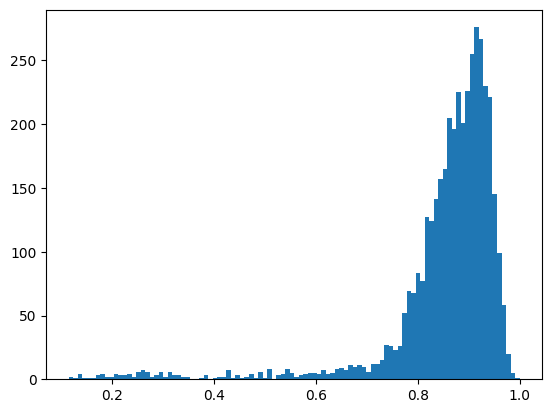

In [7]:
plt.hist(scores, bins=100)

In [8]:
data[0]

{'subtitle_file': '/weka/huongn/ow_full/00000009/i-SR-1hw0EU/i-SR-1hw0EU.en.srt',
 'content': '1\n00:00:04,880 --> 00:00:10,400\n\n2\n00:00:10,580 --> 00:00:14,680\nkimchi 200g/ Pork mince 200g/ Pork belly 90g/ Tofu 160g/ Beansprout 150g\n\n3\n00:00:14,800 --> 00:00:19,340\nGarlic mince 2tsp/ Ginger mince 2tsp/ Kimchi juice 2tbs/ Black pepper/ Soy sauce 2tbs/ Fish sauce 1tbs/ Sesame oil 1tbs/ Dumpling skin\n\n4\n00:00:20,440 --> 00:00:23,160\nHi guys! I’m going to make Kim-Chi mandoo today.\n\n5\n00:00:23,220 --> 00:00:25,240\nMandoo is Korean style Dumpling!!\n\n6\n00:00:25,480 --> 00:00:26,740\nLet’s start!!\n\n7\n00:00:26,920 --> 00:00:35,120\nFirst, I’ll make Dumpling filling. First please mix pork mince, Tofu and Kimchi. Make sure drain moisture from tofu before mix.\n\n8\n00:00:39,160 --> 00:00:44,500\nChopped the kimchi, then remove the kimchi juice as well.\n\n9\n00:00:51,200 --> 00:00:55,880\nThen add into the mixture!!\n\n10\n00:00:56,740 --> 00:01:03,480\nI’m going to add po

In [9]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,subtitle_file,content,length,audio_file,mach_content,id,man_mach_score
0,/weka/huongn/ow_full/00000009/i-SR-1hw0EU/i-SR...,"1\n00:00:04,880 --> 00:00:10,400\n\n2\n00:00:1...",386.140,/weka/huongn/ow_full/00000009/i-SR-1hw0EU/i-SR...,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,i-SR-1hw0EU,0.114442
1,/weka/huongn/ow_full/00000004/dLs602Rte9g/dLs6...,"1\n00:00:03,940 --> 00:00:08,440\nEgg Dum Biry...",333.640,/weka/huongn/ow_full/00000004/dLs602Rte9g/dLs6...,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,dLs602Rte9g,0.119514
2,/weka/huongn/ow_full/00000000/3993tVeKd-w/3993...,"1\n00:00:20,320 --> 00:00:23,640\nPlaza for sa...",14.620,/weka/huongn/ow_full/00000000/3993tVeKd-w/3993...,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,3993tVeKd-w,0.129562
3,/weka/huongn/ow_full/00000006/49nEjKpdmxc/49nE...,"1\n00:00:00,000 --> 00:00:02,000\n\n2\n00:00:0...",36.003,/weka/huongn/ow_full/00000006/49nEjKpdmxc/49nE...,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,49nEjKpdmxc,0.132286
4,/weka/huongn/ow_full/00000008/iV8LvOFznEY/iV8L...,"1\n00:00:09,948 --> 00:00:11,812\nThere was a ...",359.564,/weka/huongn/ow_full/00000008/iV8LvOFznEY/iV8L...,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,iV8LvOFznEY,0.137795


In [10]:
percentile_25 = df[df["man_mach_score"] < 0.85]
percentile_25.shape

(1304, 7)

In [12]:
import json
with open("manmach_data.json", "w") as f:
    json.dump(data[:10], f, indent=2)

In [16]:
key_mapping = {'subtitle_file': 'path', 'content': 'text', 'length': 'duration'}  # Mapping of old keys to new keys

new_data = []
for d in data[:10]:
    new_dict = {key_mapping.get(k, k): v for k, v in d.items()}
    new_data.append(new_dict)
    print(new_dict)

{'path': '/weka/huongn/ow_full/00000009/i-SR-1hw0EU/i-SR-1hw0EU.en.srt', 'text': '1\n00:00:04,880 --> 00:00:10,400\n\n2\n00:00:10,580 --> 00:00:14,680\nkimchi 200g/ Pork mince 200g/ Pork belly 90g/ Tofu 160g/ Beansprout 150g\n\n3\n00:00:14,800 --> 00:00:19,340\nGarlic mince 2tsp/ Ginger mince 2tsp/ Kimchi juice 2tbs/ Black pepper/ Soy sauce 2tbs/ Fish sauce 1tbs/ Sesame oil 1tbs/ Dumpling skin\n\n4\n00:00:20,440 --> 00:00:23,160\nHi guys! I’m going to make Kim-Chi mandoo today.\n\n5\n00:00:23,220 --> 00:00:25,240\nMandoo is Korean style Dumpling!!\n\n6\n00:00:25,480 --> 00:00:26,740\nLet’s start!!\n\n7\n00:00:26,920 --> 00:00:35,120\nFirst, I’ll make Dumpling filling. First please mix pork mince, Tofu and Kimchi. Make sure drain moisture from tofu before mix.\n\n8\n00:00:39,160 --> 00:00:44,500\nChopped the kimchi, then remove the kimchi juice as well.\n\n9\n00:00:51,200 --> 00:00:55,880\nThen add into the mixture!!\n\n10\n00:00:56,740 --> 00:01:03,480\nI’m going to add pork belly oil 

In [17]:
new_data[0]

{'path': '/weka/huongn/ow_full/00000009/i-SR-1hw0EU/i-SR-1hw0EU.en.srt',
 'text': '1\n00:00:04,880 --> 00:00:10,400\n\n2\n00:00:10,580 --> 00:00:14,680\nkimchi 200g/ Pork mince 200g/ Pork belly 90g/ Tofu 160g/ Beansprout 150g\n\n3\n00:00:14,800 --> 00:00:19,340\nGarlic mince 2tsp/ Ginger mince 2tsp/ Kimchi juice 2tbs/ Black pepper/ Soy sauce 2tbs/ Fish sauce 1tbs/ Sesame oil 1tbs/ Dumpling skin\n\n4\n00:00:20,440 --> 00:00:23,160\nHi guys! I’m going to make Kim-Chi mandoo today.\n\n5\n00:00:23,220 --> 00:00:25,240\nMandoo is Korean style Dumpling!!\n\n6\n00:00:25,480 --> 00:00:26,740\nLet’s start!!\n\n7\n00:00:26,920 --> 00:00:35,120\nFirst, I’ll make Dumpling filling. First please mix pork mince, Tofu and Kimchi. Make sure drain moisture from tofu before mix.\n\n8\n00:00:39,160 --> 00:00:44,500\nChopped the kimchi, then remove the kimchi juice as well.\n\n9\n00:00:51,200 --> 00:00:55,880\nThen add into the mixture!!\n\n10\n00:00:56,740 --> 00:01:03,480\nI’m going to add pork belly oil

In [19]:
for d in new_data:
    d["categories"] = ""

In [21]:
import json
with open("manmach_data.json", "w") as f:
    json.dump(new_data, f, indent=2)

In [23]:
import json
with open("manmach_data.json", "w") as f:
    json.dump(data, f, indent=2)